<a href="https://colab.research.google.com/github/GmBeHappy/AIAT-AI-HACKATHON-COVID-19-recognize-x-ray/blob/main/covid19_hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
#อิมพอร์ต cv2 ที่มาจาก OpenCV
import matplotlib.pyplot as plt
#อิมพอร์ต pyplot เข้ามาในชื่อ plt
from imutils import paths

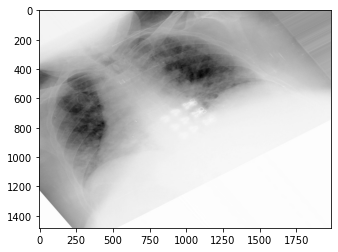

In [ ]:
image_paths = list(paths.list_images("drive/My Drive/all_data_added"))
#อ่านรูปาภาพสัตว์ทั้งหมดจากโฟลเดอร์
image = cv2.imread(image_paths[10])
#ลองใช้ cv2 อ่านรูปขึ้นมาสักรูป
new_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#หลังจากอ่านมาเสร็จแล้ว เราต้องแปลงสีก่อนเพราะ cv2 นั้นเมื่ออ่านรูปเข้ามา จะมีค่าพื้นฐานของสีเป็น BGR ซึ่งสีที่เราใช้ๆกันอยู่อย่างคุ้นตาคือ RGB เพราะฉะนั้นเราต้องแปลงก่อน
plt.figure()
#เราใช้ pyplot ในการโชว์รูปขึ้นมา แต่ก่อนที่เราจะโชว์ขึ้นมาได้เราต้องสร้างตัว figure ขึ้นมาเสียก่อน เหมือนกับการสร้างหน้าต่างโปรแกรมขึ้นมาเพื่อที่จะให้เอารูปที่จะโชว์ไปแปะ
plt.imshow(new_image)
#ใช้ฟังก์ชั่น imshow ในการโชว์รูปออกมา

In [ ]:
import random
#อิมพอร์ต random เข้ามาเพื่อที่เราจะใช้ฟังก์ชั่น shuffle
import numpy as np
#อิมพอร์ต numpy เข้ามาในชื่อ np
random.shuffle(image_paths)
#ใช้ฟังก์ชั่น shuffle ในการสลับรูปภาพเพื่อให้ภาพมันไม่เรียงติดกันเหมือนเดิมในทุกครั้ง
data = []
labels = []
#สร้างตัวแปรอาเรย์ไว้รอเก็บค่าจากการแปลงรูปเป็นข้อมูล โดย data จะใช้เก็บข้อมูลเทรน ส่วน labels จะใช้เก็บเป็นข้อมูลสอน/คำตอบ
for image_path in image_paths:
#วนลูปเพื่อทำการแปลงค่าจากรูปภาพเป็นข้อมูล
    image = cv2.imread(image_path)
    #อ่านรูปจาก image_path
    image = cv2.resize(image, (32, 32))
    #ปรับไซส์ให้รูปภาพมีคุณภาพต่ำลง(ตอนเทรนนิ่งข้อมูล คอมเราจะได้ไม่ทำงานหนักเกินไป)
    labels.append(image_path.split("/")[-2])
    #เอาชื่อ image_path ของแต่ละรูปมาเก็บค่าลงตัวแปรอาเรย์ labels
    data.append(image)
    #เอาข้อมูลรูปภาพใส่ตัวแปรอาเรย์ data เก็บไว้
data = np.array(data)
labels = np.array(labels)
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
#อิมพอร์ต LabelBinarizer ของ sklearn มาใช้
labels = lb.fit_transform(labels)
#เรียกใช้ฟังก์ชั่น fit_transform เพื่อแปลง labels เป็นเลขฐานสอง

from keras import backend
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.core import Dense, Flatten
from sklearn.model_selection import train_test_split
#อิมพอร์ตพวกของต่างๆที่จะต้องใช้จาก keras
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.1, random_state=5)
#เรียกใช้ฟังก์ชั่น train_test_split เพื่อทำการสร้างข้อมูลเทรนกับเทส
model = Sequential()
#ใช้โมเดล Sequential ของ keras
model.add(Conv2D(32, (3, 3), input_shape=(32, 32 ,3), activation='relu', padding='same'))
#ใข้คำสั่ง model.add() เพิ่มชั้น(Layer)ให้กับโมเดลโดยให้ชั้นนี้เป็น convolution layer ด้วยฟังก์ชั่น Conv2D โดยค่าพารามิเตอร์แรกคือ filters มีค่าเป็น 32 คือบอกว่า คือจำนวนฟิลเตอร์ทั้งหมดของเลเยอร์นี้มี 32 ชั้น, พารามิเตอร์ตัวที่สองคือ kernel_size มีค่าเป็น 3x3 และ input_shape=(32, 32 ,3) คือรูปขนาด 32x32 และมี 3 channels ในนี้ก็คือ RGB, activation function เป็น relu, และ padding เซ็ทไว้เป็น same  เพื่อให้ข้อมูลที่ส่งออกมีขนาดเท่าเดิม (ไม่ให้ output ที่ได้มีขนาดเล็กลง)
model.add(Flatten())
#เพิ่มชั้น(Layer) ที่เป็น flatten ให้กับโมเดลเพื่อแปลงข้อมูลจากภาพให้เป็นเวคเตอร์ ที่จะสามารถส่งต่อให้ชั้นต่อไปได้ (ง่ายๆคือเอาข้อมูลอาร์เรย์ขนาดหลายมิติจากชั้นที่แล้ว มาตีแผ่ออกเหลือแค่มิติเดียว)
model.add(Dense(3, activation='softmax'))
#เพิ่มชั้น(Layer) ที่เป็น dense ให้กับโมเดลซึ่งก็คือชั้นที่เป็น fully connected นั่นเอง และใช้ activation function เป็น softmax และมี output เป็นอาร์เรย์ขนาด (*, 3)

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
flatten_7 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 98307     
Total params: 99,203
Trainable params: 99,203
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam')


In [ ]:
model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Train on 8618 samples, validate on 2155 samples
Epoch 1/10
8618/8618 [==============================] - 7s 768us/step - loss: 9.5384 - val_loss: 1.3855
Epoch 2/10
8618/8618 [==============================] - 7s 765us/step - loss: 1.0385 - val_loss: 1.3224
Epoch 3/10
8618/8618 [==============================] - 7s 756us/step - loss: 0.8804 - val_loss: 1.3974
Epoch 4/10
8618/8618 [==============================] - 7s 764us/step - loss: 0.7779 - val_loss: 1.4736
Epoch 5/10
8618/8618 [==============================] - 7s 764us/step - loss: 0.7065 - val_loss: 1.5874
Epoch 6/10
8618/8618 [==============================] - 7s 760us/step - loss: 0.6472 - val_loss: 1.7535
Epoch 7/10
8618/8618 [==============================] - 7s 763us/step - loss: 0.6273 - val_loss: 1.8749
Epoch 8/10
8618/8618 [==============================] - 7s 764us/step - loss: 0.5796 - val_loss: 2.1254
Epoch 9/10
8618/8618 [==============================] - 7s 767us/step - loss: 0.5272 - val_loss: 2.0953
Epoch 10/10
8618

In [ ]:
y_pred = model.predict(X_test)
#หลังจากที่เราเทรนตัวโมเดลเราเสร็จ คราวนี้เราจะใช้ข้อมูลเทสมาลองให้โมเดลมัน classified โดยใช้ฟังก์ชั่น predict
from sklearn.metrics import accuracy_score, classification_report #อิมพอร์ต accuracy_score กับ classification_report จาก sklearn.metrics 
accuracy_score(y_test.argmax(axis=1), y_pred.argmax(axis=1))
#จากนั้นมาเรียกใช้ฟังก์ชั่น accuracy_score เพื่อดูความแม่นของข้อมูลที่ predict กัน

0.4682804674457429

In [ ]:
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1), target_names=lb.classes_))
#เราลองมาดูผลการ classification อย่างละเอียดกัน

              precision    recall  f1-score   support

       covid       0.49      0.61      0.54       351
      normal       0.45      0.45      0.45       412
   pneumonia       0.47      0.37      0.41       435

    accuracy                           0.47      1198
   macro avg       0.47      0.48      0.47      1198
weighted avg       0.47      0.47      0.46      1198



In [ ]:
model_2 = Sequential()
model_2.add(Conv2D(32, (3, 3), input_shape=(32, 32 ,3), activation='relu', padding='same'))
model_2.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model_2.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model_2.add(Flatten())
model_2.add(Dense(3, activation='softmax'))
model_2.compile(loss='categorical_crossentropy', optimizer='adam')
model_2.fit(X_train, y_train, epochs=10, validation_split=0.2)
y_pred = model_2.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(y_test.argmax(axis=1), y_pred.argmax(axis=1)))
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1), target_names=lb.classes_))

Train on 435 samples, validate on 109 samples
Epoch 1/10
435/435 [==============================] - 4s 10ms/step - loss: 41.3961 - val_loss: 1.1039
Epoch 2/10
435/435 [==============================] - 4s 10ms/step - loss: 1.0180 - val_loss: 1.0658
Epoch 3/10
435/435 [==============================] - 4s 10ms/step - loss: 0.8891 - val_loss: 1.0927
Epoch 4/10
435/435 [==============================] - 4s 10ms/step - loss: 0.7538 - val_loss: 1.0801
Epoch 5/10
435/435 [==============================] - 4s 10ms/step - loss: 0.6475 - val_loss: 1.2755
Epoch 6/10
435/435 [==============================] - 4s 10ms/step - loss: 0.5568 - val_loss: 1.3629
Epoch 7/10
435/435 [==============================] - 4s 10ms/step - loss: 0.4289 - val_loss: 1.5025
Epoch 8/10
435/435 [==============================] - 4s 10ms/step - loss: 0.3434 - val_loss: 1.5063
Epoch 9/10
435/435 [==============================] - 4s 10ms/step - loss: 0.2640 - val_loss: 1.8196
Epoch 10/10
435/435 [=======================

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
import csv
test_paths = list(paths.list_images("drive/My Drive/test_release"))
data2 = []
#สร้างตัวแปรอาเรย์ไว้รอเก็บค่าจากการแปลงรูปเป็นข้อมูล โดย data จะใช้เก็บข้อมูลเทรน ส่วน labels จะใช้เก็บเป็นข้อมูลสอน/คำตอบ
for test_path in test_paths:
#วนลูปเพื่อทำการแปลงค่าจากรูปภาพเป็นข้อมูล
    image = cv2.imread(test_path)
    #อ่านรูปจาก image_path
    image = cv2.resize(image, (32, 32))
    #ปรับไซส์ให้รูปภาพมีคุณภาพต่ำลง(ตอนเทรนนิ่งข้อมูล คอมเราจะได้ไม่ทำงานหนักเกินไป)
    data2.append(image)
    #เอาข้อมูลรูปภาพใส่ตัวแปรอาเรย์ data เก็บไว้
datatest = np.array(data2)

y_pred = model_2.predict_classes(datatest)
num=1

def sendout():
  row_list = [["Id", "Predicted"]]
  for i in range(len(datatest)):
    #print("%s=%s" % (i+1,y_pred[i]))
    if(i+1<10):
      dt="00"+str(i+1)
    elif(i+1<100):
      dt="0"+str(i+1)
    else:
      dt=str(i+1)
    row_list.append(["test"+dt,str(y_pred[i])])
  return row_list
#sendout()
print(sendout())

csv.register_dialect('myDialect',
                     delimiter=',',
                     quoting=csv.QUOTE_ALL)
with open('finallyyeah.csv', 'w', newline='') as file:
    writer = csv.writer(file, dialect='myDialect')
    writer.writerows(sendout())



[['Id', 'Predicted'], ['test001', '1'], ['test002', '2'], ['test003', '1'], ['test004', '2'], ['test005', '2'], ['test006', '0'], ['test007', '1'], ['test008', '2'], ['test009', '1'], ['test010', '1'], ['test011', '2'], ['test012', '2'], ['test013', '2'], ['test014', '0'], ['test015', '0'], ['test016', '2'], ['test017', '2'], ['test018', '0'], ['test019', '2'], ['test020', '2'], ['test021', '1'], ['test022', '0'], ['test023', '1'], ['test024', '2'], ['test025', '0'], ['test026', '0'], ['test027', '2'], ['test028', '0'], ['test029', '1'], ['test030', '1'], ['test031', '2'], ['test032', '2'], ['test033', '1'], ['test034', '1'], ['test035', '0'], ['test036', '0'], ['test037', '0'], ['test038', '2'], ['test039', '1'], ['test040', '0'], ['test041', '2'], ['test042', '2'], ['test043', '2'], ['test044', '1'], ['test045', '2'], ['test046', '2'], ['test047', '2'], ['test048', '1'], ['test049', '1'], ['test050', '0'], ['test051', '1'], ['test052', '2'], ['test053', '2'], ['test054', '1'], ['test